**Install Libraries**

In [1]:
!pip install ultralytics
from ultralytics import YOLO


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 23.2 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


**Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Import Dataset**

In [3]:
import os

dataset_path = "/content/drive/MyDrive/Chess"
print("Train images:", os.listdir(f"{dataset_path}/train/images")[:5])
print("Train labels:", os.listdir(f"{dataset_path}/train/labels")[:5])
print("Validation images:", os.listdir(f"{dataset_path}/val/images")[:5])
print("Validation labels:", os.listdir(f"{dataset_path}/val/labels")[:5])


Train images: ['28863804-photo_2023-03-07-12-31-30_jpeg.rf.442713485a7cc18a07aecf0317f3cf9b.jpg', '053aba01-20230315_195146_jpg.rf.3eb27486b2d808f4e3f6f369f197dbff.jpg', '1ae98aba-20230315_195058_jpg.rf.c1cb625d7a217b8fccdb2cf22dcbc78d.jpg', '210f2e62-20230315_193859_jpg.rf.e0d75c584b7a45d6485e2bbd8bd406e1.jpg', '2dbc3673-20230315_193920_jpg.rf.a413c9ed67d02d1600a6a989fb3efce9.jpg']
Train labels: ['3b91d839-20230315_195255_jpg.rf.b1ad42f22c3d451297f1d8469cca3c6b.txt', '03b0d98b-photo_2023-03-07-12-31-25_jpeg.rf.b8fce544690d4be5e938e3702521657d.txt', '06439dff-20230315_194833_jpg.rf.f9f05a02ea88238d749a8b9898f62e4d.txt', '4f59edcf-20230315_195425_jpg.rf.ade863ff45e600f66303e669849b0ff9.txt', '518dcea7-20230315_195255_jpg.rf.05f778940cee175c59bb19e5819fc8dc.txt']
Validation images: ['eeef1a36-20230315_192224_jpg.rf.5d833a8186a85fbdb3bb43b68456a6ba.jpg', 'f3c31222-20230315_192838_jpg.rf.f9edd71e612229ef2f6959f59e0e824b.jpg', 'da5f273b-20230315_193012_jpg.rf.918dfa81b1fd104f76966ac44072736

**Set Classes**

In [4]:
data_yaml = f"""
train: {dataset_path}/train/images
val: {dataset_path}/val/images

nc: 2  # Number of classes in your dataset
names: ['class1', 'class2']  # Replace with your actual class names
"""

with open("/content/data.yaml", "w") as f:
    f.write(data_yaml)

**Create YOLO model**

In [11]:
# Load YOLO model
model = YOLO("yolov8n.pt")  # YOLOv8 Nano; change to "yolov8s.pt" for small, "yolov8m.pt" for medium, etc.

# Train the model
model.train(
    data="/content/data.yaml",  # Path to the dataset configuration file
    epochs=25,                  # Number of training epochs
    imgsz=640,                  # Image size
    batch=16,                   # Batch size
    device=0                    # Use GPU (if available)
)


Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/drive/MyDrive/Chess/train/labels.cache... 52 images, 17 backgrounds, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/Chess/val/labels.cache... 7 images, 2 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      2.32G      1.554       4.01      1.269         33        640: 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          7         53     0.0022     0.0833    0.00131   0.000531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.25G      1.546      3.871      1.182         24        640: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all          7         53     0.0101      0.392    0.00791    0.00432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      2.23G      1.362      3.266      1.036         41        640: 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          7         53     0.0169      0.656     0.0158     0.0111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.24G      1.144      2.548     0.9648         43        640: 100%|██████████| 4/4 [00:01<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]

                   all          7         53     0.0224      0.885     0.0446     0.0341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      2.36G      1.172      2.115     0.9585         52        640: 100%|██████████| 4/4 [00:00<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          7         53      0.022      0.868      0.113     0.0801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.27G      1.208      1.874     0.9876         66        640: 100%|██████████| 4/4 [00:01<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all          7         53     0.0253          1      0.383       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      2.27G      1.165      1.884      1.001         53        640: 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all          7         53     0.0243      0.967      0.451      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      2.22G      1.195      1.607     0.9823         62        640: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all          7         53      0.892      0.117      0.479      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      2.19G      1.169      1.477     0.9556         88        640: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          7         53      0.745      0.259      0.537      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25       2.2G      1.117      1.383     0.9803         30        640: 100%|██████████| 4/4 [00:01<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          7         53          1     0.0909      0.496      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.19G      1.052      1.262     0.9434         61        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          7         53      0.355      0.196      0.273      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      2.25G       1.08      1.208     0.9521         60        640: 100%|██████████| 4/4 [00:00<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all          7         53      0.433       0.23       0.31      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.25G      1.089      1.131     0.9567         48        640: 100%|██████████| 4/4 [00:01<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          7         53      0.865      0.533       0.68      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      2.27G      1.014      1.078     0.9451         26        640: 100%|██████████| 4/4 [00:00<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.74it/s]

                   all          7         53      0.969      0.609      0.765       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.24G      1.034      1.076     0.9275         18        640: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          7         53      0.996      0.586      0.808      0.597


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.19G      1.006      1.056     0.9061         31        640: 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all          7         53      0.972      0.664      0.883      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.23G      1.007      1.028     0.9393         36        640: 100%|██████████| 4/4 [00:00<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all          7         53      0.982      0.729      0.929      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25       2.2G     0.9618     0.9639     0.9092         24        640: 100%|██████████| 4/4 [00:00<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.36it/s]


                   all          7         53      0.919      0.788      0.869      0.629

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.19G     0.9998      0.989     0.9415         34        640: 100%|██████████| 4/4 [00:00<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all          7         53      0.878      0.728      0.851      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25       2.2G     0.9767     0.9871      0.943         25        640: 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          7         53      0.933      0.725      0.873      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       2.2G      1.021     0.9697       0.93         34        640: 100%|██████████| 4/4 [00:00<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.42it/s]

                   all          7         53      0.899      0.859      0.935        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25       2.2G      1.008     0.8947     0.9358         29        640: 100%|██████████| 4/4 [00:00<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.11it/s]

                   all          7         53      0.926      0.856      0.943      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25       2.2G     0.9596     0.8584     0.9318         36        640: 100%|██████████| 4/4 [00:01<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.70it/s]

                   all          7         53      0.947      0.829       0.95      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25       2.2G     0.9999      1.862     0.9339          2        640: 100%|██████████| 4/4 [00:01<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          7         53      0.972      0.907      0.959      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25       2.2G     0.9422     0.8293     0.9108         37        640: 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all          7         53       0.97      0.913      0.961      0.737



25 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.55it/s]


                   all          7         53       0.97      0.913      0.961      0.738
                class1          4         23      0.979          1      0.995      0.804
                class2          5         30      0.961      0.825      0.928      0.671
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785bf6eb6860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

**Evaluate Results**

In [12]:
# Evaluate on the validation set
results = model.val()


Ultralytics 8.3.47 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Chess/val/labels.cache... 7 images, 2 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]


                   all          7         53       0.97      0.913      0.961      0.741
                class1          4         23      0.979          1      0.995      0.804
                class2          5         30      0.961      0.827      0.927      0.679
Speed: 0.3ms preprocess, 6.3ms inference, 0.0ms loss, 11.4ms postprocess per image
Results saved to runs/detect/train32


**Visualise Prediction**


image 1/1 /content/drive/MyDrive/Chess/test/images/acd8ba19-20230315_192652_jpg.rf.125d86f8c2d6694454b7c473b0b4d975.jpg: 640x640 2 class1s, 2 class2s, 7.6ms
Speed: 1.8ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


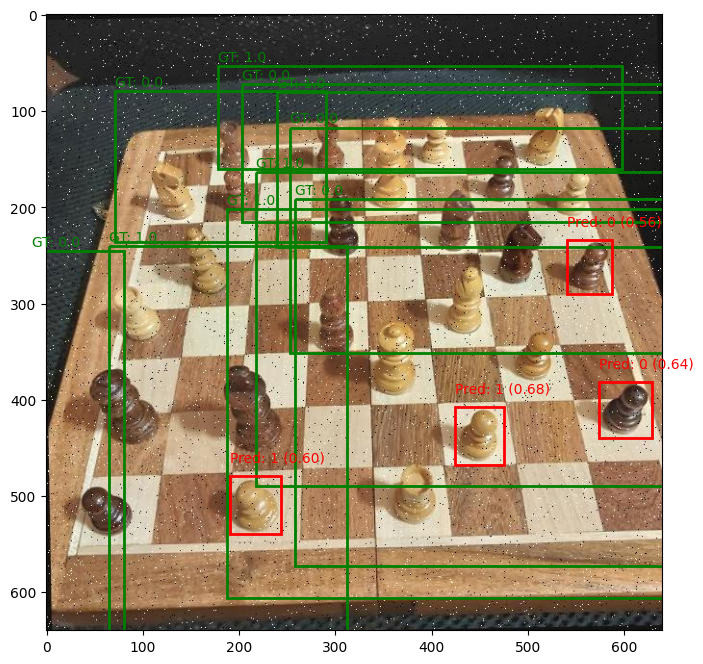

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

def visualize_yolo_predictions(model, image_path, label_path, conf_threshold=0.5):
    """
    Visualize YOLO predictions and ground truth boxes.

    Parameters:
    - model: YOLOv8 model object.
    - image_path: Path to the test image.
    - label_path: Path to the ground truth label file.
    - conf_threshold: Confidence threshold for displaying predictions.
    """
    # Load and display the image
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(img)

        # Draw ground truth boxes (from YOLO label file)
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                values = line.strip().split()

                # Only take the first 5 values if extra values are present
                if len(values) >= 5:
                    class_id, x_center, y_center, width, height = map(float, values[:5])

                    # Convert YOLO format (normalized) to box corners
                    img_width, img_height = img.size
                    x_min = (x_center - width / 2) * img_width
                    y_min = (y_center - height / 2) * img_height
                    x_max = (x_center + width / 2) * img_width
                    y_max = (y_center + height / 2) * img_height

                    # Add ground truth box to the plot
                    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                            linewidth=2, edgecolor="green", facecolor="none")
                    ax.add_patch(rect)
                    ax.text(x_min, y_min - 5, f"GT: {class_id}", color="green")
                else:
                    print(f"Skipping invalid line: {line.strip()}")


    # Get predictions from YOLOv8 model
    results = model.predict(source=image_path, conf=conf_threshold)
    predictions = results[0]  # Assuming one image at a time

    # Draw predicted boxes
    for box, score, class_id in zip(predictions.boxes.xyxy, predictions.boxes.conf, predictions.boxes.cls):
        if score > conf_threshold:
            x_min, y_min, x_max, y_max = box.cpu().numpy()
            rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                     linewidth=2, edgecolor="red", facecolor="none")
            ax.add_patch(rect)
            ax.text(x_min, y_min - 15, f"Pred: {int(class_id)} ({score:.2f})", color="red")

    plt.show()

# Example Usage
image_path = "/content/drive/MyDrive/Chess/test/images/acd8ba19-20230315_192652_jpg.rf.125d86f8c2d6694454b7c473b0b4d975.jpg"
label_path = "/content/drive/MyDrive/Chess/test/labels/acd8ba19-20230315_192652_jpg.rf.125d86f8c2d6694454b7c473b0b4d975.txt"

# Assuming `model` is already trained or loaded
visualize_yolo_predictions(model, image_path, label_path)


**Performance Metrics**

Performance Metrics:
Mean Average Precision (mAP@50): 0.961
Mean Average Precision (mAP@50-95): 0.741
Average Recall (AR): 0.913

Class-wise Metrics:
Class 1:
  Precision: 0.979
  Recall: 1.000
  AP@50: 0.995
  AP@50-95: 0.804

Class 2:
  Precision: 0.961
  Recall: 0.827
  AP@50: 0.927
  AP@50-95: 0.679
